In [342]:
#-- EJERCICIO 1 --
import numpy as np, pandas as pd, seaborn as sns
%matplotlib inline
import scipy
from matplotlib import pyplot as plt
pd.set_option.display_maxcolumns = 100

In [343]:
#-- EJERCICIO 2A) --
data = pd.read_csv('C:/Users/juanj/OneDrive/Documentos/3er cuatri/dataset_housing.csv')
data.head(5)
tabla_nules_inicio=pd.DataFrame(data.isnull().sum())  #con esto vemos los nan en cada columna
tabla_nules_inicio = tabla_nules_inicio[tabla_nules_inicio.iloc[:,0] != 0] 
tabla_nules_inicio

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [344]:
#-- EJERCICIO 2 B) --
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [345]:
#-- EJERCICIO 3 A) --
houses = len(data)
print(f'Las viviendas que hay en el conjunto de datos son {houses}')

Las viviendas que hay en el conjunto de datos son 1460


-- EJERCICIO 3 B --


Al ejecutar este código nos sale el número de valores nulos que supuestamente hay en cada columna. Pero hay que tener cuidado, ya que si miramos la documentación, el valor de algunas variables puede ser 'NA' haciendo referncia a 'NO _', pero pandas lo puede confundir con el valor 'NaN', lo cual complicaría el procesado de los datos. En el siguiente ejercicio trataremos este problema con más detalle.

In [346]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

-- EJERCICIO 6 -- (SIN LOS DATOS ALTERADOS)

- Histograma LotFrontage (se hace una explicación más en detalle en el ejercicio 4, más adelante):

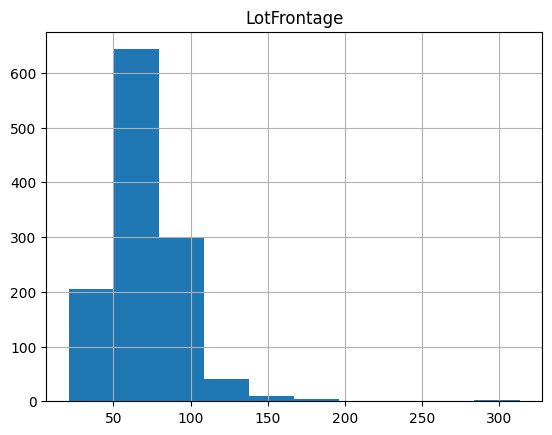

In [347]:
fig, ax = plt.subplots(1, 1) 
ax.hist(data['LotFrontage']) 
  
ax.set_title("LotFrontage")
plt.grid()
plt.show()

- Histograma LotArea (Tasmbién se explica más adelante en el 4, en relación a la distribución de cola pesada que muestra)

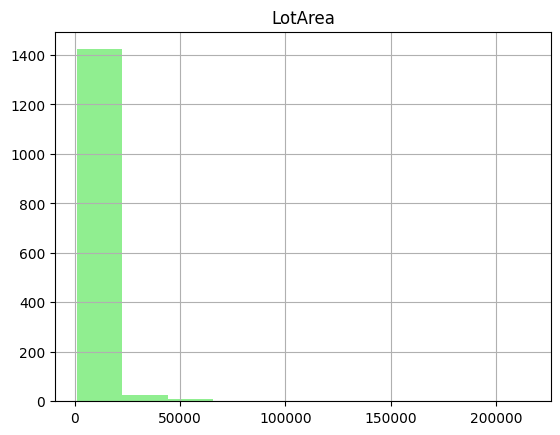

In [348]:
fig, ax = plt.subplots(1, 1) 
ax.hist(data['LotArea'],color = "lightgreen") 
  
ax.set_title("LotArea")
plt.grid()
plt.show()

- Histograma SalePrice (también se explica más adelante, también con la misma distribución que la variable anterior)

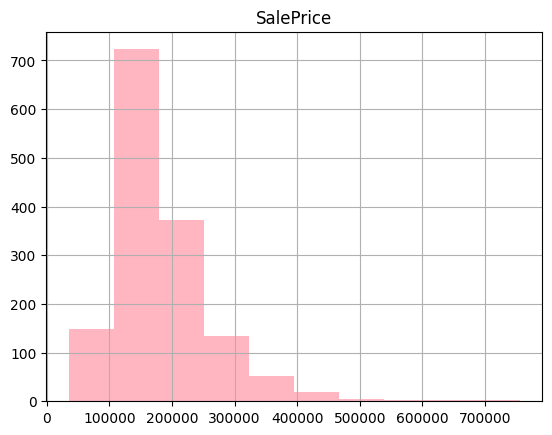

In [349]:
fig, ax = plt.subplots(1, 1) 
ax.hist(data['SalePrice'],color = "lightpink") 
  
ax.set_title("SalePrice")
plt.grid()
plt.show()

- Histograma OverallQual

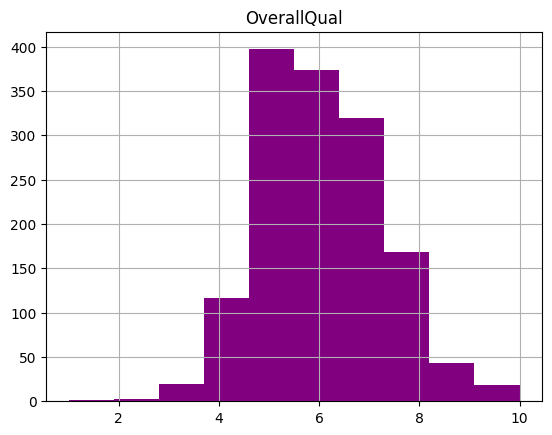

In [350]:
fig, ax = plt.subplots(1, 1) 
ax.hist(data['OverallQual'],color = "purple") 
  
ax.set_title("OverallQual")
plt.grid()
plt.show()

Al ajustar los datos en el ejercicio 4, nos hemos tenido que parar a mirar que distribución seguían estos para cada variable, por eso ya están comentados en dicho ejercicio. En este último histograma, aunque es el que más se acerca a una distribución normal, aún así hay valores extremos que se deberían ajustar.

- Donut LandSlope

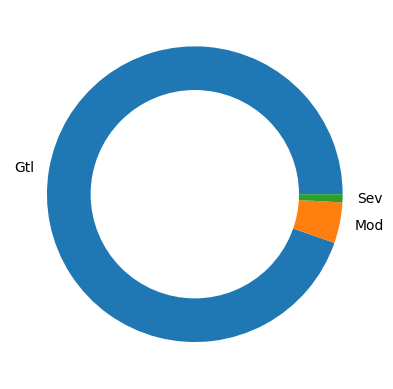

In [351]:
plt.pie([len(data[data.LandSlope == 'Gtl']), len(data[data.LandSlope == 'Mod']), len(data[data.LandSlope == 'Sev'])], labels=["Gtl", "Mod", "Sev"])
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle);

Hay muchísimas más viviendas con pendiente suave ('Gtl), que con una pendiente moderada ('Mod') o severa('Sev')

- Donut Neighborhood

In [352]:
list(data['Neighborhood'].unique())

['CollgCr',
 'Veenker',
 'Crawfor',
 'NoRidge',
 'Mitchel',
 'Somerst',
 'NWAmes',
 'OldTown',
 'BrkSide',
 'Sawyer',
 'NridgHt',
 'NAmes',
 'SawyerW',
 'IDOTRR',
 'MeadowV',
 'Edwards',
 'Timber',
 'Gilbert',
 'StoneBr',
 'ClearCr',
 'NPkVill',
 'Blmngtn',
 'BrDale',
 'SWISU',
 'Blueste']

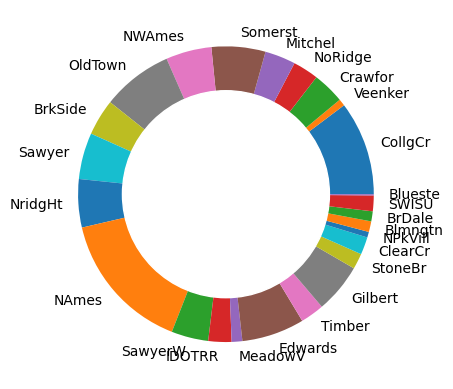

In [353]:
l = [len(data[data.Neighborhood == x]) for x in list(data['Neighborhood'].unique())]
plt.pie(l, labels=list(data['Neighborhood'].unique()))
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle);

Como se puede observar, los vecindarios de la ciudad de Ames (Iowa) más grandes y poblados es donde hay más vivviendas. Estos son: Names (North Ames), CollgCr (College Creek) y OldTown. Más adelante veremos como tratar con tantos datos categóricos

-- EJERCICIO 4 --

1. Id

In [354]:
print('- Id:')

#Hallar los valores únicos
unique = data['Id'].unique()

print(f'Los valores únicos son: {unique}')

print(f'Las variables son categóricas sin ordena')
print('No se usan los números para establecer un orden sino para identificar nuestras muestras')


#Hallar los valores nulos
n = data['Id'].isnull().sum() 

print(f'No hay valores nulos: {n}')

#Obtenemos el valor máximo
max = data['Id'].describe().T[['max']] 

#Obtenemos el valor mínimo
min = data['Id'].describe().T[['min']] 

print(f'Los valores máximo y mínimo: \n{max}\n{min}')

#No hace falta sacar los outliers

- Id:
Los valores únicos son: [   1    2    3 ... 1458 1459 1460]
Las variables son categóricas sin ordena
No se usan los números para establecer un orden sino para identificar nuestras muestras
No hay valores nulos: 0
Los valores máximo y mínimo: 
max   1460.0
Name: Id, dtype: float64
min   1.0
Name: Id, dtype: float64


2. MSSubClass

In [355]:
print('- MSSubClass:')

#Hallar los valores únicos
unique = data['MSSubClass'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['MSSubClass'].dtype 

print(f'Las variables son numéricas discretas: {tipo}')
print('Cada número representa el tipo de vivienda que se está ofertando:')
#from tabulate import tabulate #para mostrar el valor de las variables
mssubclass = [[20, '1-STORY 1946 & NEWER ALL STYLES'],
        [30,'1-STORY 1945 & OLDER'],
        [40, '1-STORY W/FINISHED ATTIC ALL AGES'],
        [45, '1-1/2 STORY - UNFINISHED ALL AGES'],
        [50, '1-1/2 STORY FINISHED ALL AGES'],
        [60, '2-STORY 1946 & NEWER'],
        [70,'2-STORY 1945 & OLDER'],
        [75,'2-1/2 STORY ALL AGES'],
        [80,'SPLIT OR MULTI-LEVEL'],
        [85,'SPLIT FOYER'],
        [90,'DUPLEX - ALL STYLES AND AGES'],
       [120,'1-STORY PUD (Planned Unit Development) - 1946 & NEWER'],
       [150,'1-1/2 STORY PUD - ALL AGES'],
       [160,'2-STORY PUD - 1946 & NEWER'],
       [180,'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'],
       [190,'2 FAMILY CONVERSION - ALL STYLES AND AGES']]
#print(tabulate(mssubclass))

#Hallar los valores nulos
n = data['MSSubClass'].isnull().sum() 

print(f'No hay valores nulos: {n}')

#Obtenemos el valor máximo
max = data['MSSubClass'].describe().T[['max']] 

#Obtenemos el valor mínimo
min = data['MSSubClass'].describe().T[['min']] 

print(f'Los valores máximo y mínimo: \n{max}\n{min}')

#Sacamos los outliers a partir de esta función:
def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))
outliermss1 = data['MSSubClass'][is_outlier_IQR(data['MSSubClass'])]

#Hacemos unique para ver los valores exactos
outliermss2 = outliermss1.unique()

#Usamos len() para ver cuantos outliers hay en la columna
print(f'Los valores de los outliers son: {outliermss2}, y en total son {len(outliermss1)} ')

- MSSubClass:
Los valores únicos son: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Las variables son numéricas discretas: int64
Cada número representa el tipo de vivienda que se está ofertando:
No hay valores nulos: 0
Los valores máximo y mínimo: 
max   190.0
Name: MSSubClass, dtype: float64
min   20.0
Name: MSSubClass, dtype: float64
Los valores de los outliers son: [190 160 180], y en total son 103 


No vamos a eliminar la columna MSSubClass porque no hay valores nulos, y a la hora de analizar los outliers, no creemos que estos supongan algún problema a la hora de hacer el modelo.Sin embargo,  al analizar la relación que tiene con otras variables nos hemos dado cuenta que tiene una fuerte relación inversamente proporcional con LotFrontage:


<Axes: >

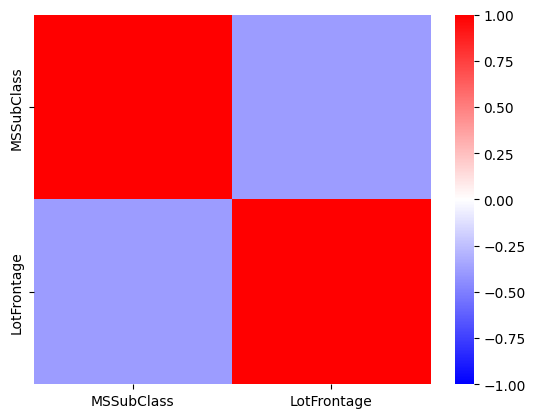

In [356]:
new_data2 = data[['MSSubClass', 'LotFrontage']].copy()
sns.heatmap(new_data2.corr(), cmap="bwr", vmin=-1,vmax=1)

Esto quiere decir que cuanto menor es el numero asociado a MSSubClass, mayor es el número que toma LotFrontage en esa fila. Analicemos ahora LotFrontage:

3. LotFrontage

In [357]:
print('- LotFrontage:')

#Hallar los valores únicos
unique = data['LotFrontage'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['LotFrontage'].dtype 

print(f'Las variables son numéricas continuas: {tipo} \nRepresenta los pies de porción de suelo conectada a la propieda')

#Hallar los valores nulos
n = data['LotFrontage'].isnull().sum()

print(f'Los valores nulos son: {n}')

#Obtenemos el valor máximo
max = data['LotFrontage'].describe().T[['max']] 

#Obtenemos el valor mínimo
min = data['LotFrontage'].describe().T[['min']]

print(f'Los valores máximo y mínimo: \n{max}\n{min}')

#Sacamos los outliers a partir de esta función:
def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))
outlierlot1 = data['LotFrontage'][is_outlier_IQR(data['LotFrontage'])]

#Hacemos unique para ver los valores exactos
outlierlot2 = outlierlot1.unique()

#Usamos len() para ver cuantos outliers hay en la columna
print(f'Los valores de los outliers son: {outlierlot2}, y en total son {len(outlierlot1)} ')

#Clasificamos los outliers en mayores y menores a la media:
mayores = [ x > data['LotFrontage'].mean() for x in list(outlierlot2)]
menores = [ x < data['LotFrontage'].mean() for x in list(outlierlot2)]
print(f'Los valores mayores que la media son: {outlierlot2[mayores]}, y los menores: {outlierlot2[menores]}')

- LotFrontage:
Los valores únicos son: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Las variables son numéricas continuas: float64 
Representa los pies de porción de suelo conectada a la propieda
Los valores nulos son: 259
Los valores máximo y mínimo: 
max   313.0
Name: LotFrontage, dtype: float64
min   21.0
Name: LotFrontage, dtype: float64
Los valores de los outliers son: [112. 115.  24.  21. 121. 122. 120. 134. 141. 174. 129. 140. 118. 116.
 150. 130. 137. 144. 114. 128. 14

En cuanto a los outliers, definimos una función que uando los rangos intercuartílicos y recibiendo un DataFrame y el nombre de una columna saca los outliers de esta. Al ver en un histograma cómo son los valores nos damos cuanta de que hay una distribución de cola pesada , por lo que haremos una trasformación logarítmica y así tener una distribución que se asemeje mucho más a una normal, que es lo que buscaremos en el futuro para el aprendizaje de nuestros modelos.

- Creemos que aquí las variables son continuas porque al ser la medida en pies del fragmento de suelo conectada a la propieda y estar definidas como un float, pueden tomar todo tipo de valores en un cierto intervalo.
- Veamos a continuación la relación que tiene con MSSubClass más detenidamente:

In [358]:
new_data2 = data[['MSSubClass', 'LotFrontage']]
group = new_data2.groupby('LotFrontage')
pd.options.display.float_format = '{:.1f}'.format
group.agg(np.mean)

C:\Users\juanj\AppData\Local\Temp\ipykernel_8800\3833223259.py:4: FutureWarning: The provided callable <function mean at 0x00000212FEC59D80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  group.agg(np.mean)


,MSSubClass
LotFrontage,
21.0,166.1
24.0,160.0
30.0,131.7
32.0,128.0
33.0,190.0
...,...
160.0,60.0
168.0,60.0
174.0,67.5


Como se ha visto antes, en las filas donde están los outliers de MSSubClass es donde están los valores más comunes de LotFrontage y vice versa. Por tanto, hemos decidio mantener los valores atípìcos en las dos variables. También se puede ver claramente en este histograma:

Text(0, 0.5, 'Cantidad')

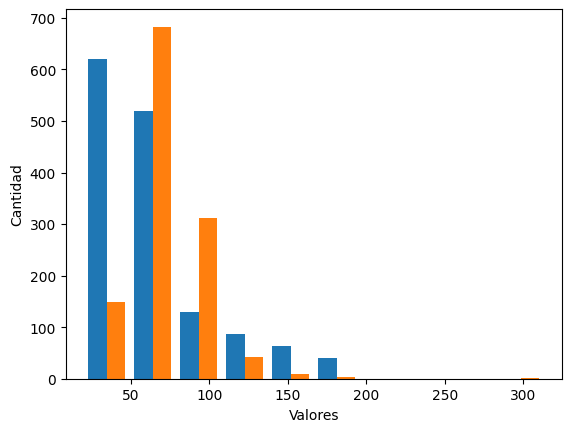

In [359]:
fig, ax = plt.subplots(1, 1)
ax.hist(new_data2)
ax.set_xlabel('Valores')
ax.set_ylabel('Cantidad')

Además, para tratar los valores nulos en LotFrontage creemos que lo mejor es sustituir estos por la media, ya que estos valores nulos pueden dar problemas a la hora de realizar el modelo por la estrecha relación que tiene esta variable con el resto (como se verá más adelante). Tampoco hemos visto adecuado sustituir estos valores nulos por ceros porque, además de afectar a la relación con las otras variables, a la hora de interpretar los datos no tiene mucho sentido que una propiedad no tenga ningún fragmento de calle conectada a ella.

In [360]:
data.fillna({x:data['LotFrontage'].mean() for x in ['LotFrontage']}, inplace=True)

4. MSZoning

In [361]:
print('- MSZoning:')

#Hallar los valores únicos
unique = data['MSZoning'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['MSZoning'].dtype 

print(f'Las variables son categóricas sin orden: {tipo} \nClasifica de forma general la zona en la que se encuentra la vivienda') #Cambiarlo a tipo numerico

#Hallar los valores nulos
n = data['MSZoning'].isnull().sum() 

print(f'No hay valores nulos: {n}')

- MSZoning:
Los valores únicos son: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Las variables son categóricas sin orden: object 
Clasifica de forma general la zona en la que se encuentra la vivienda
No hay valores nulos: 0


Codifiquemos numéricamente esta columna:

In [362]:
lc_dummies = pd.get_dummies(data['MSZoning'], dtype=int) 
lc_dummies[lc_dummies.iloc[:] == 1].sum()
data = pd.get_dummies(data, columns=['MSZoning'], dtype=int) 
data

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2,2008,WD,Normal,208500,0,0,0,1,0
1,2,20,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,5,2007,WD,Normal,181500,0,0,0,1,0
2,3,60,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,9,2008,WD,Normal,223500,0,0,0,1,0
3,4,70,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,2,2006,WD,Abnorml,140000,0,0,0,1,0
4,5,60,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,12,2008,WD,Normal,250000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,8,2007,WD,Normal,175000,0,0,0,1,0
1456,1457,20,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2,2010,WD,Normal,210000,0,0,0,1,0
1457,1458,70,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,5,2010,WD,Normal,266500,0,0,0,1,0
1458,1459,20,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,4,2010,WD,Normal,142125,0,0,0,1,0


No hemos creido conveniente eliminar ni juntar ninguno de estos valores, ya que cada uno representa la zona en la que se encuentra la vivienda

5. LotArea

In [363]:
print('- LotArea:')

#Hallar los valores únicos
unique = data['LotArea'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['LotArea'].dtype 

print(f'Las variables son numéricas discretas: {tipo} \nIndica el área de la vivienda en pies cuadrados') #Cambiarlo a tipo numerico

#Hallar los valores nulos
n = data['LotArea'].isnull().sum() 

print(f'No hay valores nulos: {n}')

#Obtenemos el valor máximo
max = data['LotArea'].describe().T[['max']] 

###ASI ES COMO LO HACE EL PROFE, HAY OTRA FORMA MÁS BONITA DE HACERLO
#Obtenemos el valor mínimo
min = data['LotArea'].describe().T[['min']] 

print(f'Los valores máximo y mínimo: \n{max}\n{min}')

#Sacamos los outliers a partir de esta función:
def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))
outliergaca1 = data['LotArea'][is_outlier_IQR(data['LotArea'])]

#Hacemos unique para ver los valores exactos
outliergaca2 = outliergaca1.unique()

#Usamos len() para ver cuantos outliers hay en la columna
print(f'Los valoresn de los outliers son: {outliergaca2}, y en total son {len(outliergaca1)} ')

- LotArea:
Los valores únicos son: [ 8450  9600 11250 ... 17217 13175  9717]
Las variables son numéricas discretas: int64 
Indica el área de la vivienda en pies cuadrados
No hay valores nulos: 0
Los valores máximo y mínimo: 
max   215245.0
Name: LotArea, dtype: float64
min   1300.0
Name: LotArea, dtype: float64
Los valoresn de los outliers son: [ 50271  19900  21000  21453  19378  31770  22950  25419 159000  19296
  39104  19138  18386 215245 164660  20431  18800  53107  34650  22420
  21750  70761  53227  40094  32668  21872  21780  25095  46589  20896
  18450  21535  26178 115149  21695  53504  21384  28698  45600  17920
  25286  27650  24090  25000   1300  21286   1477  29959  18000  23257
  17755  35760  18030  35133  32463  18890  24682  23595  17871  36500
  63887  20781  25339  57200  20544  19690  21930  26142], y en total son 69 


Decimos que los outliers son verosímiles al comprobar que se muestran las caracterísitcas de correlación, por ejemplo, al coger esta variable con SalePrice. Tal y como mostraremos posteriormente en una matriz de correclación, ambas están correlacionadas de forma positiva. Si vemos el histograma nos damos cuenta que sigue una distribuccion de cola pesada: 

<Axes: >

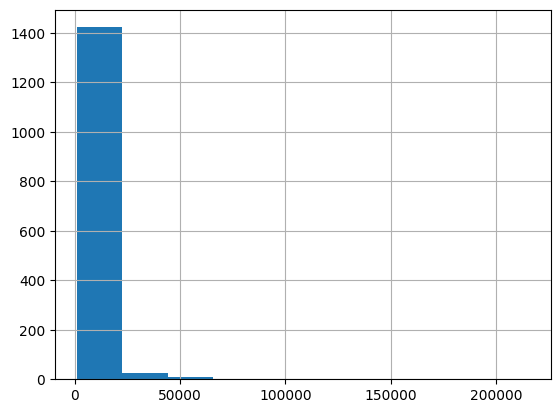

In [364]:
data['LotArea'].hist()

Para tartar este problema vamos a realizar una transformación logarítmica a los datos:

<Axes: >

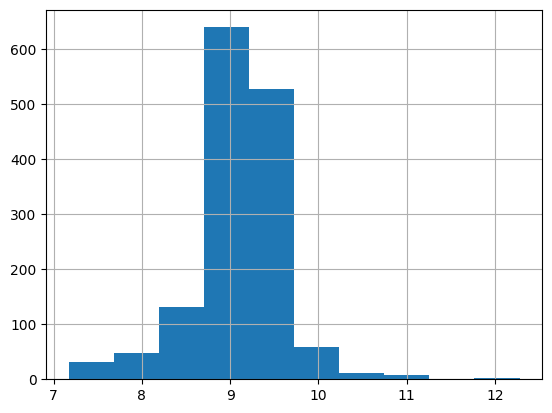

In [365]:
log_lotarea=pd.DataFrame(np.log(data['LotArea']))
data['LotArea']=log_lotarea#transformación logarítmica
data['LotArea'].hist()  


6. Street

In [366]:
print('- Street:')

#Hallar los valores únicos
unique = data['Street'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['Street'].dtype 

print(f'Las variables son categóricas sin orden: {tipo} \nRepresenta el tipo de suelo que accede a la propiedad') #Cambiarlo a tipo numerico

#Hallar los valores nulos
n = data['Street'].isnull().sum() 

print(f'No hay valores nulos: {n}')

- Street:
Los valores únicos son: ['Pave' 'Grvl']
Las variables son categóricas sin orden: object 
Representa el tipo de suelo que accede a la propiedad
No hay valores nulos: 0


Para tratar con las variables categóricas vamos a aplicar la dicotomización ('one hot encoding):

In [367]:
data2 = pd.get_dummies(data, drop_first=True, columns=['Street'], dtype= int)
data2

,Id,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave
0,1,60,65.0,9.0,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,2008,WD,Normal,208500,0,0,0,1,0,1
1,2,20,80.0,9.2,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,2007,WD,Normal,181500,0,0,0,1,0,1
2,3,60,68.0,9.3,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,2008,WD,Normal,223500,0,0,0,1,0,1
3,4,70,60.0,9.2,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,2006,WD,Abnorml,140000,0,0,0,1,0,1
4,5,60,84.0,9.6,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,2008,WD,Normal,250000,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,9.0,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,2007,WD,Normal,175000,0,0,0,1,0,1
1456,1457,20,85.0,9.5,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,2010,WD,Normal,210000,0,0,0,1,0,1
1457,1458,70,66.0,9.1,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,2010,WD,Normal,266500,0,0,0,1,0,1
1458,1459,20,68.0,9.2,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,2010,WD,Normal,142125,0,0,0,1,0,1


In [368]:
streetdummies = pd.get_dummies(data['Street'], dtype=int)
streetdummies[streetdummies.iloc[:] == 1].sum()

Grvl      6.0
Pave   1454.0
dtype: float64

Al hacer esto último vemos que hay muy pocas filas con valor 'Grvl' para la variable Street. Las seis que tienen este valor no consideramos que aporten mucho al modelo.

In [369]:
data[data.Street == 'Grvl']

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
52,53,90,110.0,9.0,Grvl,NaN,IR2,Bnk,AllPub,Corner,...,5,2010,WD,Normal,110000,0,0,0,0,1
335,336,190,70.0,12.0,Grvl,NaN,IR1,HLS,AllPub,Corner,...,8,2008,WD,Normal,228950,0,0,0,1,0
582,583,90,81.0,9.4,Grvl,NaN,Reg,Lvl,AllPub,Inside,...,5,2007,WD,Normal,118500,0,0,0,1,0
812,813,20,66.0,9.1,Grvl,NaN,Reg,Bnk,AllPub,Inside,...,6,2010,WD,Alloca,55993,1,0,0,0,0
1061,1062,30,120.0,9.8,Grvl,NaN,Reg,Low,AllPub,Inside,...,8,2008,ConLD,Normal,81000,1,0,0,0,0
1184,1185,20,50.0,10.5,Grvl,NaN,Reg,Lvl,AllPub,Inside,...,5,2007,WD,Normal,186700,0,0,0,1,0


In [370]:
data = data.drop(labels=[52,335,582,812,1061,1184], axis= 0)

Si decidimos eliminar estas seis filas, el resto de viviendas tendran un único valor para Street, lo cual nos parece inútil a la hora de desarrollar el modelo. Por ello, hemos decidido eliminar esta columna.

In [371]:
data = data.drop(columns=['Street'])

7. Alley

In [372]:
print('- Alley:')

#Hallar los valores únicos
unique = data['Alley'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['Alley'].dtype 

print(f'Las variables son categóricas sin orden: {tipo} \nTraducida al español sería ‘callejón’') #Cambiarlo a tipo numerico

#Hallar los valores nulos
n = data['Alley'].isnull().sum() 

print(f'Los valores nulos: {n}')

- Alley:
Los valores únicos son: [nan 'Grvl' 'Pave']
Las variables son categóricas sin orden: object 
Traducida al español sería ‘callejón’
Los valores nulos: 1363


En este caso, podemos ver cómo Pandas ha confundido el valor NA (No Alley Access) con NaN, así que procedemos a modificar dicha columna del DataFrame para quitar los NaN por No access. De hecho, si abrimos el csv sin pandas, podemos visualizar que pone en siempre NA en vez de NaN, por lo que Pandas manipula esta columna de forma errónea.

In [373]:
data.fillna({x:'NO ACCESS' for x in ['Alley']}, inplace=True)

Recodificamos la columna. Procedemos con los dummies, indicando drop_first=True para quitar una columna (Sabremos que es Alley_Grvl cuando las dos columnas restantes sean False).

In [374]:
data = pd.get_dummies(data, drop_first=True, columns=['Alley'], dtype=int) 
data

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NO ACCESS,Alley_Pave
0,1,60,65.0,9.0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,WD,Normal,208500,0,0,0,1,0,1,0
1,2,20,80.0,9.2,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,WD,Normal,181500,0,0,0,1,0,1,0
2,3,60,68.0,9.3,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,WD,Normal,223500,0,0,0,1,0,1,0
3,4,70,60.0,9.2,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,WD,Abnorml,140000,0,0,0,1,0,1,0
4,5,60,84.0,9.6,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,WD,Normal,250000,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,9.0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,WD,Normal,175000,0,0,0,1,0,1,0
1456,1457,20,85.0,9.5,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,WD,Normal,210000,0,0,0,1,0,1,0
1457,1458,70,66.0,9.1,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,WD,Normal,266500,0,0,0,1,0,1,0
1458,1459,20,68.0,9.2,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,WD,Normal,142125,0,0,0,1,0,1,0


8. LotShape

In [375]:
print('- LotShape:')

#Hallar los valores únicos
unique = data['LotShape'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['LotShape'].dtype 

print(f'Las variables son categóricas con orden: {tipo} \nRepresenta la forma general de la propiedad') #Cambiarlo a tipo numerico

#Hallar los valores nulos
n = data['LotShape'].isnull().sum() 

print(f'No hay valores nulos: {n}')

- LotShape:
Los valores únicos son: ['Reg' 'IR1' 'IR2' 'IR3']
Las variables son categóricas con orden: object 
Representa la forma general de la propiedad
No hay valores nulos: 0


- Hemos creido que son variables categóricas con orden porque a estos valores se les puede atribuir un orden: Regular-1, ... Irregular-4; ya que la forma que tiene una casa puede estar relacionada con otras variables en el dataset (el precio de la casa, el tamaño del garaje, la calidad de esta, etc.)
- Antes de codificar numéricamente, vamos a ver el número de filas que tienen cada valor: 

In [376]:
lotdummies = pd.get_dummies(data['LotShape'],) 
lotdummies[lotdummies.iloc[:] == 1].sum() 

IR1    483
IR2     40
IR3     10
Reg    921
dtype: object

Para simplificar los datos vemos más práctico juntar IR2 e IR3 ya que ambas indican que la propiedad es excesivamente irregular. 

In [377]:
data = data.replace({'LotShape': {'IR2':'I','IR3': 'I'} })
data

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NO ACCESS,Alley_Pave
0,1,60,65.0,9.0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,WD,Normal,208500,0,0,0,1,0,1,0
1,2,20,80.0,9.2,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,WD,Normal,181500,0,0,0,1,0,1,0
2,3,60,68.0,9.3,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,WD,Normal,223500,0,0,0,1,0,1,0
3,4,70,60.0,9.2,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,WD,Abnorml,140000,0,0,0,1,0,1,0
4,5,60,84.0,9.6,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,WD,Normal,250000,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,9.0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,WD,Normal,175000,0,0,0,1,0,1,0
1456,1457,20,85.0,9.5,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,WD,Normal,210000,0,0,0,1,0,1,0
1457,1458,70,66.0,9.1,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,WD,Normal,266500,0,0,0,1,0,1,0
1458,1459,20,68.0,9.2,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,WD,Normal,142125,0,0,0,1,0,1,0


Ahora lo codificaremos numéricamente:

In [378]:
data = data.replace({'LotShape': {'Reg':1,'IR1': 2, 'I': 3} })
data

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NO ACCESS,Alley_Pave
0,1,60,65.0,9.0,1,Lvl,AllPub,Inside,Gtl,CollgCr,...,WD,Normal,208500,0,0,0,1,0,1,0
1,2,20,80.0,9.2,1,Lvl,AllPub,FR2,Gtl,Veenker,...,WD,Normal,181500,0,0,0,1,0,1,0
2,3,60,68.0,9.3,2,Lvl,AllPub,Inside,Gtl,CollgCr,...,WD,Normal,223500,0,0,0,1,0,1,0
3,4,70,60.0,9.2,2,Lvl,AllPub,Corner,Gtl,Crawfor,...,WD,Abnorml,140000,0,0,0,1,0,1,0
4,5,60,84.0,9.6,2,Lvl,AllPub,FR2,Gtl,NoRidge,...,WD,Normal,250000,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,9.0,1,Lvl,AllPub,Inside,Gtl,Gilbert,...,WD,Normal,175000,0,0,0,1,0,1,0
1456,1457,20,85.0,9.5,1,Lvl,AllPub,Inside,Gtl,NWAmes,...,WD,Normal,210000,0,0,0,1,0,1,0
1457,1458,70,66.0,9.1,1,Lvl,AllPub,Inside,Gtl,Crawfor,...,WD,Normal,266500,0,0,0,1,0,1,0
1458,1459,20,68.0,9.2,1,Lvl,AllPub,Inside,Gtl,NAmes,...,WD,Normal,142125,0,0,0,1,0,1,0


9. LandContour

In [379]:
print('- LandContour:')

#Hallar los valores únicos
unique = data['LandContour'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['LandContour'].dtype 

print(f'Las variables son categóricas sin orden: {tipo} \nIndica cómo de llano es el terreno de la propiedad') #Cambiarlo a tipo numerico

#Hallar los valores nulos
n = data['LandContour'].isnull().sum() 

print(f'Los valores nulos: {n}')

- LandContour:
Los valores únicos son: ['Lvl' 'Bnk' 'Low' 'HLS']
Las variables son categóricas sin orden: object 
Indica cómo de llano es el terreno de la propiedad
Los valores nulos: 0


Codificamos las variables:

In [380]:
lc_dummies = pd.get_dummies(data['LandContour'], dtype=int) 
lc_dummies[lc_dummies.iloc[:] == 1].sum()
data = pd.get_dummies(data, columns=['LandContour'], dtype=int) 
data

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NO ACCESS,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,1,60,65.0,9.0,1,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,1,0,1,0,0,0,0,1
1,2,20,80.0,9.2,1,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,1,0,1,0,0,0,0,1
2,3,60,68.0,9.3,2,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,1,0,1,0,0,0,0,1
3,4,70,60.0,9.2,2,AllPub,Corner,Gtl,Crawfor,Norm,...,0,0,1,0,1,0,0,0,0,1
4,5,60,84.0,9.6,2,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,9.0,1,AllPub,Inside,Gtl,Gilbert,Norm,...,0,0,1,0,1,0,0,0,0,1
1456,1457,20,85.0,9.5,1,AllPub,Inside,Gtl,NWAmes,Norm,...,0,0,1,0,1,0,0,0,0,1
1457,1458,70,66.0,9.1,1,AllPub,Inside,Gtl,Crawfor,Norm,...,0,0,1,0,1,0,0,0,0,1
1458,1459,20,68.0,9.2,1,AllPub,Inside,Gtl,NAmes,Norm,...,0,0,1,0,1,0,0,0,0,1


10. Utilities

In [381]:
print('- Utilities:')

#Hallar los valores únicos
unique = data['Utilities'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['Utilities'].dtype 

print(f'Las variables son categóricas sin orden: {tipo} \nRepresenta los servicios disponibles en la vivienda') #Cambiarlo a tipo numerico

#Hallar los valores nulos
n = data['Utilities'].isnull().sum() 

print(f'No hay valores nulos: {n}')

- Utilities:
Los valores únicos son: ['AllPub' 'NoSeWa']
Las variables son categóricas sin orden: object 
Representa los servicios disponibles en la vivienda
No hay valores nulos: 0


Veamos en cuántas filas aparecen estos valores:

In [382]:
utidummies = pd.get_dummies(data['Utilities'],) 
utidummies[utidummies.iloc[:] == 1].sum()

AllPub    1453
NoSeWa       1
dtype: object

Al igual que en Street, si eliminamos la unica vivienda con valor 'NoSeWa' vamos a tenere valores constantes en toda esa columna, por tanto es mejor eliminarla:

In [383]:
data = data.drop(944)

In [384]:
data = data.drop(columns=['Utilities'])

#Nota: sabemos que hhay un método específico para detectar valores constantes, pero si lo usamos saldría False ya que hay aun así un sólo valor distinto al resto. Hemos convertido esta columna en un atributo de valores constantes al eliminar los otros valores que eran distintos, haciéndola inservible.

11. LandSlope

In [385]:
print('- LandSlope:')

#Hallar los valores únicos
unique = data['LandSlope'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['LandSlope'].dtype 

print(f'Las variables son categóricas con orden: {tipo} \nSe refiere a la pendiente de la propiedad') 

#Hallar los valores nulos
n = data['LandSlope'].isnull().sum() 

print(f'Los valores nulos son: {n}') 

- LandSlope:
Los valores únicos son: ['Gtl' 'Mod' 'Sev']
Las variables son categóricas con orden: object 
Se refiere a la pendiente de la propiedad
Los valores nulos son: 0


In [386]:
lc_dummies = pd.get_dummies(data['LandSlope'], dtype=int)
print(lc_dummies[lc_dummies.iloc[:] == 1].sum())

Gtl   1379.0
Mod     62.0
Sev     12.0
dtype: float64


Hay 3 grados: prendiente suave, moderada y severa. No tiene nan y la gran mayoría de muestras tiene una pendiente gentil. Como solo hay 65 casos de moderada y 13 de severa, para simplificar los datos hemos decidido unificar estas dos categorías en una llamada pendiente considerable.

In [387]:
data = data.replace({'LandSlope': {'Mod':'Considerable','Sev': 'Considerable'}})

Numéricamente:

In [388]:
data = data.replace({'LandSlope': {'Gtl': 0, 'Considerable' : 1}})
data

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NO ACCESS,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,1,60,65.0,9.0,1,Inside,0,CollgCr,Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
1,2,20,80.0,9.2,1,FR2,0,Veenker,Feedr,Norm,...,0,0,1,0,1,0,0,0,0,1
2,3,60,68.0,9.3,2,Inside,0,CollgCr,Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
3,4,70,60.0,9.2,2,Corner,0,Crawfor,Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
4,5,60,84.0,9.6,2,FR2,0,NoRidge,Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,9.0,1,Inside,0,Gilbert,Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
1456,1457,20,85.0,9.5,1,Inside,0,NWAmes,Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
1457,1458,70,66.0,9.1,1,Inside,0,Crawfor,Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
1458,1459,20,68.0,9.2,1,Inside,0,NAmes,Norm,Norm,...,0,0,1,0,1,0,0,0,0,1


12. Neighborhood

In [389]:
print('- Neighborhood:')

#Hallar los valores únicos
unique = data['Neighborhood'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['Neighborhood'].dtype 

print(f'Las variables son categóricas sin orden: {tipo} \nRepresenta las ubicaciones dentro de los límites de la ciudad de Ames') #Cambiarlo a tipo numerico

#Hallar los valores nulos
n = data['Neighborhood'].isnull().sum() 

print(f'No hay valores nulos: {n}')

#juntar los barrios pequeños

- Neighborhood:
Los valores únicos son: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Las variables son categóricas sin orden: object 
Representa las ubicaciones dentro de los límites de la ciudad de Ames
No hay valores nulos: 0


A la hora de codificar estas variables (ya se con one hot o numéricamente), nos van a salir muchísimas columnas. Por tanto la solución más eficiente sería agruparlos (discretzarlos), juntando los vecindarios donde no haya tantas viviendas

In [390]:
#Sacamos los vecindarios donde hay más viviendas (por encima de la media)
neidummies = pd.get_dummies(data['Neighborhood']) 
neidummies[neidummies.iloc[:] == 1].sum() #Devuelve el nº de filas donde aparece ese valor

b = [ x > neidummies[neidummies.iloc[:] == 1].sum().mean() for x in neidummies[neidummies.iloc[:] == 1].sum()]
neidummies[neidummies.iloc[:] == 1].sum()[b].unique()#Los vecindarios más repetidos en el dataset

array([150, 99, 79, 225, 73, 77, 113, 74, 59, 86], dtype=object)

In [391]:
#Ahora tenemos como podríamos agrupar los vecindarios
neidummies = pd.get_dummies(data['Neighborhood']) 
neidummies[neidummies.iloc[:] == 1].sum()
neigh = neidummies[neidummies.iloc[:] == 1].sum()
bins = [0, int(neidummies[neidummies.iloc[:] == 1].sum().mean()), 59, 73, 74, 77, 79, 86, 100, 113, 150, 225]
neigh_discretized = pd.cut(neigh, bins)
neigh_discretized
#Nota: no los hemos podido hacer directamente porque no eran variables numéricas

Blmngtn       (0, 58]
Blueste       (0, 58]
BrDale        (0, 58]
BrkSide       (0, 58]
ClearCr       (0, 58]
CollgCr    (113, 150]
Crawfor       (0, 58]
Edwards     (86, 100]
Gilbert      (77, 79]
IDOTRR        (0, 58]
MeadowV       (0, 58]
Mitchel       (0, 58]
NAmes      (150, 225]
NPkVill       (0, 58]
NWAmes       (59, 73]
NoRidge       (0, 58]
NridgHt      (74, 77]
OldTown    (100, 113]
SWISU         (0, 58]
Sawyer       (73, 74]
SawyerW      (58, 59]
Somerst      (79, 86]
StoneBr       (0, 58]
Timber        (0, 58]
Veenker       (0, 58]
dtype: category
Categories (11, interval[int64, right]): [(0, 58] < (58, 59] < (59, 73] < (73, 74] ... (86, 100] < (100, 113] < (113, 150] < (150, 225]]

Ahora lo sustituimos en el dataframe

In [392]:
data = data.replace({'Neighborhood': neigh_discretized})
data

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NO ACCESS,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,1,60,65.0,9.0,1,Inside,0,"(113, 150]",Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
1,2,20,80.0,9.2,1,FR2,0,"(0, 58]",Feedr,Norm,...,0,0,1,0,1,0,0,0,0,1
2,3,60,68.0,9.3,2,Inside,0,"(113, 150]",Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
3,4,70,60.0,9.2,2,Corner,0,"(0, 58]",Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
4,5,60,84.0,9.6,2,FR2,0,"(0, 58]",Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,9.0,1,Inside,0,"(77, 79]",Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
1456,1457,20,85.0,9.5,1,Inside,0,"(59, 73]",Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
1457,1458,70,66.0,9.1,1,Inside,0,"(0, 58]",Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
1458,1459,20,68.0,9.2,1,Inside,0,"(150, 225]",Norm,Norm,...,0,0,1,0,1,0,0,0,0,1


13. YearBuilt y YearRemodAdd

In [393]:
print('- YearBuilt:')

#Hallar los valores únicos
unique = data['YearBuilt'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['YearBuilt'].dtype 

print(f'Las variables son numéricas discretas: {tipo} \nRepresenta el año en el que se construyó la casa') #Cambiarlo a tipo numerico

#Hallar los valores nulos
n = data['YearBuilt'].isnull().sum() 

print(f'No hay valores nulos: {n}')

#Obtenemos el valor máximo
max = data['YearBuilt'].describe().T[['max']] 

###ASI ES COMO LO HACE EL PROFE, HAY OTRA FORMA MÁS BONITA DE HACERLO
#Obtenemos el valor mínimo
min = data['YearBuilt'].describe().T[['min']] 

print(f'Los valores máximo y mínimo: \n{max}\n{min}')

#Sacamos los outliers a partir de esta función:
def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))
outliergaca1 = data['YearBuilt'][is_outlier_IQR(data['YearBuilt'])]

#Hacemos unique para ver los valores exactos
outliergaca2 = outliergaca1.unique()

#Usamos len() para ver cuantos outliers hay en la columna
print(f'Los outliers: {outliergaca2}, y en total son {len(outliergaca1)} ')

- YearBuilt:
Los valores únicos son: [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1981 1964 1999 1972 1921
 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985 1979
 1885 1919 1990 1969 1935 1988 1971 1952 1963 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
Las variables son numéricas discretas: int64 
Representa el año en el que se construyó la casa
No hay valores nulos: 0
Los valores máximo y mínimo: 
max   2010.0
Name: YearBuilt, dtype: float64
min   1872.0
Name: YearBuilt, dtype: float64
Los outliers: [1880 1882 1875 1872], y en total son 7 


Si hacemos un tratamiento de outliers nos salen algunas casas de la década de 1870, pero no son realmente outliers ya que las casas fueron todas construidas entre 1872(min) y 2010(max) (por ejemplo, un dato que sí clasificaríamos como atípico sería una casa construida en 1492). La media del año de contrucción es 1971.

Para evitar la dispersión de cara a nuestro futuro modelo podríamos agrupar nuestras muestras por intervalos de 5 o 10 años. Para tener en esta columna
solamente múltiplos de 10 podríamos truncar los años, y por tanto estaríamos agrupandolos en intervalos de 10, reduciendo así los outliers a solamente 2. Para hacer esto le quitaremos a cada año su último dígito (ej: 1972-2). Podemos verlo a partir de un histograma:

<Axes: >

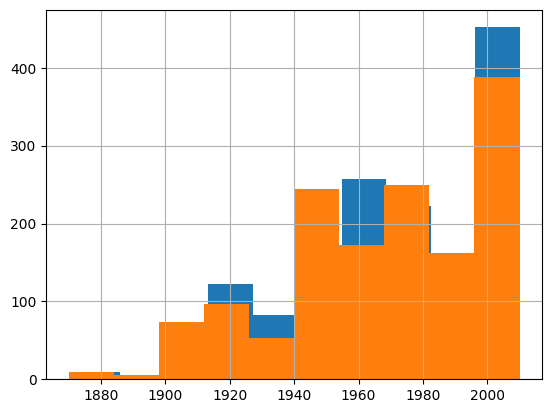

In [394]:
data['YearBuilt'].hist() #color azul (antes de los intervalos)
for fila in data['YearBuilt']:
    
    data = data.replace({'YearBuilt': {fila:fila-int(str(fila)[3])}})
data['YearBuilt']
data['YearBuilt'].hist() #color naranja

In [395]:
print('- YearRemodAdd:')

#Hallar los valores únicos
unique = data['YearRemodAdd'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['YearRemodAdd'].dtype 

print(f'Las variables son numéricas discretas: {tipo} \nSe refiere a una fecha en la que se remodeló la casa') #Cambiarlo a tipo numerico

#Hallar los valores nulos
n = data['YearRemodAdd'].isnull().sum() 

print(f'No hay valores nulos: {n}')

#Obtenemos el valor máximo
max = data['YearRemodAdd'].describe().T[['max']] 

###ASI ES COMO LO HACE EL PROFE, HAY OTRA FORMA MÁS BONITA DE HACERLO
#Obtenemos el valor mínimo
min = data['YearRemodAdd'].describe().T[['min']] 

print(f'Los valores máximo y mínimo: \n{max}\n{min}')

#Sacamos los outliers a partir de esta función:
def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))
outliergaca1 = data['YearRemodAdd'][is_outlier_IQR(data['YearRemodAdd'])]

#Hacemos unique para ver los valores exactos
outliergaca2 = outliergaca1.unique()

#Usamos len() para ver cuantos outliers hay en la columna
print(f'No hay outliers {len(outliergaca1)} ')

- YearRemodAdd:
Los valores únicos son: [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1987 1964 1972
 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999 1985
 1979 1977 1969 1958 1991 1971 1952 1963 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
Las variables son numéricas discretas: int64 
Se refiere a una fecha en la que se remodeló la casa
No hay valores nulos: 0
Los valores máximo y mínimo: 
max   2010.0
Name: YearRemodAdd, dtype: float64
min   1950.0
Name: YearRemodAdd, dtype: float64
No hay outliers 0 


Al tratarse de un intervalo más pequeño que el de year built los datos se encuentran menos separados y por tanto no encontramos outliers.

14. GarageCars, GarageArea, GarageQual, GarageCond, GarageType,
GarageYrBlt y GarageFinish

In [396]:
print('- GarageCars:')

#Hallar los valores únicos
unique = data['GarageCars'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['GarageCars'].dtype 

print(f'Las variables son numéricas discretas: {tipo} \nRepresenta cuántos coches caben en el garaje') #Cambiarlo a tipo numerico

#Hallar los valores nulos
n = data['GarageCars'].isnull().sum() 

print(f'No hay valores nulos: {n}')

#Obtenemos el valor máximo
max = data['GarageCars'].describe().T[['max']] 

###ASI ES COMO LO HACE EL PROFE, HAY OTRA FORMA MÁS BONITA DE HACERLO
#Obtenemos el valor mínimo
min = data['GarageCars'].describe().T[['min']] 

print(f'Los valores máximo y mínimo: \n{max}\n{min}')

#Sacamos los outliers a partir de esta función:
def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))
outliergaca1 = data['GarageCars'][is_outlier_IQR(data['GarageCars'])]

#Hacemos unique para ver los valores exactos
outliergaca2 = outliergaca1.unique()

#Usamos len() para ver cuantos outliers hay en la columna
print(f'El valor del outlier es: {int(outliergaca2)}, y en total son {len(outliergaca1)} ')

- GarageCars:
Los valores únicos son: [2 3 1 0 4]
Las variables son numéricas discretas: int64 
Representa cuántos coches caben en el garaje
No hay valores nulos: 0
Los valores máximo y mínimo: 
max   4.0
Name: GarageCars, dtype: float64
min   0.0
Name: GarageCars, dtype: float64
El valor del outlier es: 4, y en total son 5 


In [397]:
print('- GarageArea:')

#Hallar los valores únicos
unique = data['GarageArea'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['GarageArea'].dtype 

print(f'Las variables son numéricas continua: {tipo} \nRepresenta el tamaño del garaje en pies cuadrados') #Cambiarlo a tipo numerico

#Hallar los valores nulos
n = data['GarageArea'].isnull().sum() 

print(f'No hay valores nulos: {n}') #SI NO TIENE GARAJE SALE 0

#Obtenemos el valor máximo
max = data['GarageArea'].describe().T[['max']] 

#Obtenemos el valor mínimo
min = data['GarageArea'].describe().T[['min']] 

print(f'Los valores máximo y mínimo: \n{max}\n{min}')

#Sacamos los outliers a partir de esta función:
def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))
outliergaa1 = data['GarageArea'][is_outlier_IQR(data['GarageArea'])]

#Hacemos unique para ver los valores exactos
outliergaa2 = outliergaa1.unique()

#Usamos len() para ver cuantos outliers hay en la columna
print(f'Los valores de los outliers son: {outliergaa2}, y en total son {len(outliergaa1)} ')

- GarageArea:
Los valores únicos son: [ 548  460  608  642  836  480  636  484  468  205  384  736  352  840
  576  516  294  853  280  534  572  270  890  772  319  240  250  271
  447  556  691  672  498  246    0  440  308  504  300  670  826  386
  388  528  894  565  641  288  645  852  558  220  667  360  427  490
  379  297  283  509  405  758  461  400  462  420  432  506  684  472
  366  476  410  740  648  273  546  325  792  450  180  430  594  390
  540  264  530  435  453  750  487  624  471  318  766  660  470  720
  577  380  434  866  495  564  312  625  680  678  726  532  216  303
  789  511  616  521  451 1166  252  497  682  666  786  795  856  473
  398  500  349  454  644  299  210  431  438  675  968  721  336  810
  494  457  818  463  604  389  538  520  309  429  673  884  868  492
  413  924 1053  439  671  338  573  732  505  575  626  898  529  685
  281  539  418  588  282  375  683  843  552  870  888  746  708  513
 1025  656  872  292  441  189  880  67

Tanto 'GarageCars' como 'GarageArea' miden el espacio del garaje. Debido a esto, y como creemos que 'GarageArea' es más preciso, vamos a eliminar la columna de 'GarageCars' para no tener dos columnas que digan lo mismo:

In [398]:
data = data.drop(columns=['GarageCars'])

Hemos decidido no eliminar los outliers ni reemplazarlos ya que pueden estar relacionados con otras variables como se verá más adelante al hacer la matriz de correlación. Y a pesar de los valores extremos, no vemos prudente hacer una transformación logarítmica debido a los ceros presentes, que representan que no hay garaje pero hay que tenerlos en cuenta.

In [399]:
print('- GarageQual:')

#Hallar los valores únicos
unique = data['GarageQual'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['GarageQual'].dtype 

print(f'Las variables son categóricas con orden: {tipo} \nRepresenta la calidad del garaje') 

#Hallar los valores nulos
n = data['GarageQual'].isnull().sum() 

print(f'Los valores nulos son: {n}') 

- GarageQual:
Los valores únicos son: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Las variables son categóricas con orden: object 
Representa la calidad del garaje
Los valores nulos son: 80


Aquí nos encontramos con el problema descrito en el ejercicio 3. Al mirar la documentación vemos que 'nan' se está confundiendo con 'NA', que significa 'NO GARAGE'. Por tanto vamos a cambiarlo.

In [400]:
data.fillna({x:'NG' for x in ['GarageQual']}, inplace=True)

Primero vemos a ver si podemos simplificar los datos:

In [401]:
gadummies = pd.get_dummies(data['GarageQual']) 
gadummies[gadummies.iloc[:] == 1].sum()

Ex       3
Fa      48
Gd      14
NG      80
Po       3
TA    1305
dtype: object

Hemos decidido juntar Excellent('Ex') y Good ('Gd) ya que son muy parecidos. También vamos a juntar Typical/Average ('TA) y Fair ('Fa), porque representan valores similares:


In [402]:
data = data.replace({'GarageQual': {'Ex': 'Gd', 'Fa': 'TA'}})
data['GarageQual'].unique()

array(['TA', 'Gd', 'NG', 'Po'], dtype=object)

Ahora vamos a codificar numércicamente 'GarageQual':

In [403]:
data = data.replace({'GarageQual': {'NG': 0, 'Po' : 1, 'TA' : 2, 'Gd': 3}})
data

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NO ACCESS,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,1,60,65.0,9.0,1,Inside,0,"(113, 150]",Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
1,2,20,80.0,9.2,1,FR2,0,"(0, 58]",Feedr,Norm,...,0,0,1,0,1,0,0,0,0,1
2,3,60,68.0,9.3,2,Inside,0,"(113, 150]",Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
3,4,70,60.0,9.2,2,Corner,0,"(0, 58]",Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
4,5,60,84.0,9.6,2,FR2,0,"(0, 58]",Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,9.0,1,Inside,0,"(77, 79]",Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
1456,1457,20,85.0,9.5,1,Inside,0,"(59, 73]",Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
1457,1458,70,66.0,9.1,1,Inside,0,"(0, 58]",Norm,Norm,...,0,0,1,0,1,0,0,0,0,1
1458,1459,20,68.0,9.2,1,Inside,0,"(150, 225]",Norm,Norm,...,0,0,1,0,1,0,0,0,0,1


In [404]:
print('- GarageCond:')

#Hallar los valores únicos
unique = data['GarageCond'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['GarageCond'].dtype 

print(f'Las variables son categóricas con orden: {tipo} \nRepresenta la condición del garaje') 

#Hallar los valores nulos
n = data['GarageCond'].isnull().sum() 

print(f'Los valores nulos son: {n}') 

- GarageCond:
Los valores únicos son: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
Las variables son categóricas con orden: object 
Representa la condición del garaje
Los valores nulos son: 80


Como es prácticamente igual a 'GarageQual', hemos decidio que lo mejor es eliminar esta columna, para no tener datos repetidos:

In [405]:
data = data.drop(columns=['GarageCond'])

In [406]:
print('- GarageType:')

#Hallar los valores únicos
unique = data['GarageType'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['GarageType'].dtype 

print(f'Las variables son categóricas sin orden: {tipo} \nRepresenta la ubicación del garaje en la vivienda') 

#Hallar los valores nulos
n = data['GarageType'].isnull().sum() 

print(f'Los valores nulos son: {n}') 

- GarageType:
Los valores únicos son: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
Las variables son categóricas sin orden: object 
Representa la ubicación del garaje en la vivienda
Los valores nulos son: 80


Primero arreglamos el problema de los valores nulos:

In [407]:
data.fillna({x:'NG' for x in ['GarageType']}, inplace=True)

Simplifiquemos los datos:

In [408]:
gadummies = pd.get_dummies(data['GarageType']) 
gadummies[gadummies.iloc[:] == 1].sum()

2Types       5
Attchd     869
Basment     17
BuiltIn     88
CarPort      8
Detchd     386
NG          80
dtype: object

Hemos decidido juntar Attached to home ('Attchd) y	Built-In ('BuiltIn'), porque en ambos el garaje está junto con la vivienda. En cambio no creemos conveniente juntar 2Types con nigún otro a pesar de que haya pocos de estos, ya que no se sabe con que otro valor encajaría mejor:

In [409]:
data = data.replace({'GarageType': {'BuiltIn': 'Attchd'}})
data['GarageType'].unique()

array(['Attchd', 'Detchd', 'CarPort', 'NG', 'Basment', '2Types'],
      dtype=object)

Codifiquemos numéricamente:

In [410]:
data = data.replace({'GarageType': {'Attchd':4, 'Detchd': 1, 'CarPort':2, 'NG': 0, 'Basment':3, '2Types':5}})

In [411]:
print('- GarageYrBlt:')

#Hallar los valores únicos
unique = data['GarageYrBlt'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['GarageYrBlt'].dtype 

print(f'Las variables son numéricas discretas: {tipo} \nRepresenta el año en el que se construyó el garaje') 

#Hallar los valores nulos
n = data['GarageYrBlt'].isnull().sum() 

print(f'Los valores nulos son: {n}')

#Obtenemos el valor máximo
max = data['GarageYrBlt'].describe().T[['max']] 

#Obtenemos el valor mínimo
min = data['GarageYrBlt'].describe().T[['min']] 

print(f'Los valores máximo y mínimo: \n{max}\n{min}')

#Sacamos los outliers a partir de esta función:
def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))
outliergay1 = data['GarageYrBlt'][is_outlier_IQR(data['GarageYrBlt'])]

#Hacemos unique para ver los valores exactos
outliergay2 = outliergay1.unique()

#Usamos len() para ver cuantos outliers hay en la columna
print(f'No hay outliers: {len(outliergay1)} ')

- GarageYrBlt:
Los valores únicos son: [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948. 1974.
 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1963. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
Las variables son numéricas discretas: float64 
Representa el año en el que se construyó el garaje
Los valores nulos son: 80
Los valores máximo y mínimo: 
max   2010.0
Name: GarageYrBlt, dtype: float64
min   1900.0
Name: GarageYrBlt, dtype: float64
No hay outliers: 0 


Si nos fijamos, vemos que el número de valores nulos coincide con el número de viviendas que no tenía garaje como vimos anteriormente, por tanto el valor nulo hace referencia a la ausencia de garaje. Hemos obtado en sustituir estos valores nulos por 0.

In [412]:
data.fillna({x:0 for x in ['GarageYrBlt']}, inplace=True)

In [413]:
print('- GarageFinish:')

#Hallar los valores únicos
unique = data['GarageFinish'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['GarageFinish'].dtype 

print(f'Las variables son categóricas con orden: {tipo} \nRepresenta el acabado del garaje') 

#Hallar los valores nulos
n = data['GarageFinish'].isnull().sum() 

print(f'Los valores nulos son: {n}')

- GarageFinish:
Los valores únicos son: ['RFn' 'Unf' 'Fin' nan]
Las variables son categóricas con orden: object 
Representa el acabado del garaje
Los valores nulos son: 80


Arreglamos el problema de los valores nulos:

In [414]:
data.fillna({x:'NG' for x in ['GarageFinish']}, inplace=True)

Veamos si podemos simplificar los datos:

In [415]:
gafdummies = pd.get_dummies(data['GarageFinish']) 
gafdummies[gafdummies.iloc[:] == 1].sum()

Fin    351
NG      80
RFn    419
Unf    603
dtype: object

No creemos conveniente unificar dos valores
Recodificamos:

In [416]:
data = data.replace({'GarageFinish': {'Unf': 1, 'RFn':2, 'NG': 0, 'Fin':3}})

15. OverallQual

In [417]:
print('- OverallQual:')

#Hallar los valores únicos
unique = data['OverallQual'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['OverallQual'].dtype 

print(f'Las variables son numéricas discretas: {tipo} \nSe refiere al acabado de la casa y a los materiales usados para construirla') 

#Hallar los valores nulos
n = data['OverallQual'].isnull().sum() 

print(f'No hay valores nulos: {n}')

#Obtenemos el valor máximo
max = data['OverallQual'].describe().T[['max']] 

#Obtenemos el valor mínimo
min = data['OverallQual'].describe().T[['min']] 

print(f'Los valores máximo y mínimo: \n{max}\n{min}')

#Sacamos los outliers a partir de esta función:
def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))
outliercon1 = data['OverallQual'][is_outlier_IQR(data['OverallQual'])]

#Hacemos unique para ver los valores exactos
outliercon2 = outliercon1.unique()

#Usamos len() para ver cuantos outliers hay en la columna
print(f'El valor del outlier es: {int(outliercon2)}, y en total son {len(outliercon1)} ')

- OverallQual:
Los valores únicos son: [ 7  6  8  5  9  4 10  3  1  2]
Las variables son numéricas discretas: int64 
Se refiere al acabado de la casa y a los materiales usados para construirla
No hay valores nulos: 0
Los valores máximo y mínimo: 
max   10.0
Name: OverallQual, dtype: float64
min   1.0
Name: OverallQual, dtype: float64
El valor del outlier es: 1, y en total son 2 


En el DataFrame encontramos solo dos casas con un rate de 1 (de hecho se cuentan como outliers), y 3 con el valor 2, por lo que procedemos a hacer un subgrupo para valores menores o iguales a tres, modificación que se agradecerá para poder viusalizar mejor los datos. La moda es el valor cinco, que cuenta con un poco más de muestras que 6 y 7.

In [418]:
#Nº casas con cada rate
lc_dummies = pd.get_dummies(data['OverallQual'], dtype=int)
lc_dummies[lc_dummies.iloc[:] == 1].sum()

1      2.0
2      3.0
3     19.0
4    116.0
5    393.0
6    372.0
7    319.0
8    168.0
9     43.0
10    18.0
dtype: float64

In [419]:
data = data.replace({'OverallQual': {1:'<=3', 2: '<=3',3: '<=3'}})

16. OverallCond

In [420]:
print('- OverallCond:')

#Hallar los valores únicos
unique = data['OverallCond'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['OverallCond'].dtype 

print(f'Las variables son numéricas discretas: {tipo} \nRepresenta la condición total de la casa') 

#Hallar los valores nulos
n = data['OverallCond'].isnull().sum() 

print(f'No hay valores nulos: {n}')

#Obtenemos el valor máximo
max = data['OverallCond'].describe().T[['max']] 

#Obtenemos el valor mínimo
min = data['OverallCond'].describe().T[['min']] 

print(f'Los valores máximo y mínimo: \n{max}\n{min}')

#Sacamos los outliers a partir de esta función:
def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))
outliercon1 = data['OverallCond'][is_outlier_IQR(data['OverallCond'])]

#Hacemos unique para ver los valores exactos
outliercon2 = outliercon1.unique()

#Usamos len() para ver cuantos outliers hay en la columna
print(f'Los valores de los outliers son: {outliercon2}, y en total son {len(outliercon1)} ')

- OverallCond:
Los valores únicos son: [5 8 6 7 4 2 3 9 1]
Las variables son numéricas discretas: int64 
Representa la condición total de la casa
No hay valores nulos: 0
Los valores máximo y mínimo: 
max   9.0
Name: OverallCond, dtype: float64
min   1.0
Name: OverallCond, dtype: float64
Los valores de los outliers son: [8 2 3 9 1], y en total son 125 


Aunque parezaca que tiene relación con 'OverallQual', los valores en cada fila de 'OverallCond' son muy distintos a los de esta, por tanto hemos decidido que es mejor no eliminarla. Vamos a agrupar los valores por intervalos para tratar los outliers al igual que antes:

In [421]:
#Nº casas con cada rate
lc_dummies = pd.get_dummies(data['OverallQual'], dtype=int)
lc_dummies[lc_dummies.iloc[:] == 1].sum()

4     116.0
5     393.0
6     372.0
7     319.0
8     168.0
9      43.0
10     18.0
<=3    24.0
dtype: float64

In [422]:
data = data.replace({'OverallQual': {1:'<=3', 2: '<=3',3: '<=3'}})

#Nota: todas las variables categóricas ordenadas las hemos codificado siendo (0: lo peor, nº mas alto: lo mejor)

17. SalePrice

In [423]:
print('- SalePrice:')

#Hallar los valores únicos
unique = data['SalePrice'].unique()

print(f'Los valores únicos son: {unique}')

#Ver el tipo en el dataframe
tipo = data['SalePrice'].dtype 

print(f'Las variables son numéricas discretas: {tipo} \nRepresenta la condición total de la casa') 

#Hallar los valores nulos
n = data['SalePrice'].isnull().sum() 

print(f'No hay valores nulos: {n}')

#Obtenemos el valor máximo
max = data['SalePrice'].describe().T[['max']] 

#Obtenemos el valor mínimo
min = data['SalePrice'].describe().T[['min']] 

print(f'Los valores máximo y mínimo: \n{max}\n{min}')

#Sacamos los outliers a partir de esta función:
def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))
outliercon1 = data['SalePrice'][is_outlier_IQR(data['SalePrice'])]

#Hacemos unique para ver los valores exactos
outliercon2 = outliercon1.unique()

#Usamos len() para ver cuantos outliers hay en la columna
print(f'Los valores de los outliers son: {outliercon2}, y en total son {len(outliercon1)} ')

- SalePrice:
Los valores únicos son: [208500 181500 223500 140000 250000 143000 307000 200000 129900 118000
 129500 345000 144000 279500 157000 132000 149000  90000 159000 139000
 325300 139400 230000 154000 256300 134800 306000 207500  68500  40000
 149350 179900 165500 277500 309000 145000 153000 109000  82000 160000
 170000 130250 141000 319900 239686 249700 113000 127000 177000 114500
 385000 130000 180500 172500 196500 438780 124900 158000 101000 202500
 219500 317000 180000 226000  80000 225000 244000 185000 144900 107400
  91000 135750 136500 110000 193500 153500 245000 126500 168500 260000
 174000 164500  85000 123600 109900  98600 163500 133900 204750 214000
  94750  83000 128950 205000 178000 118964 198900 169500 100000 115000
 190000 136900 383970 217000 259500 176000 155000 320000 163990 136000
 153900 181000  84500 128000  87000 150000 150750 220000 171000 231500
 166000 204000 125000 105000 222500 122000 372402 235000  79000 109500
 269500 254900 162500 412500 103200 1520

Encontramos 32 outliers, lo que quiere decir que los valores están menos dispersos que en LotArea (además de que Sale Price se mueve en un intervalo mucho mayor). Este caso viene a ser muy parecido al anterior de LotArea : vemos un error eliminar las filas con outliers o modificarlas, ya que perdemos o cambiamos la información.

En lugar de ello, preferimos contar con información en nuestro dataset de casas que son más grandes y lujosas a pesar de que sean una minoría y nuestro programa pueda llegar a verlos como un dato no deseado. No hay que olvidar que probablemente si quisiésemos en un momento hacer un grupo con ellos nos darían una información exclusiva sobre sus caracterísitcas en común.

De nuevo, podemos hacer intervalos de precios, pero esta vez haremos una transformación logarítmica ya que en el histograma como podemos apreciar hay una distribución de cola pesada y queremos asemejarla a una normal.

EJERCICIO 5: ¿FILAS ELIMINADAS?

En nuestro caso hemos eliminado 6 muestras debido a Street porque nos habíamos encontrado con el hecho de que solo 6 filas tenían gravel y el resto estaban pavimientadas. Como la diferencia era abismal, no vimos mucho sentido en mantener aqullas calles sin pavimentar y las quitamos. Por ello, al contar con solo propiedades en calles pavimentadas, consideramos oportuno eliminar la columna al no existir diferencia entre nuestros datos.

En Utilities, al igual que en Street, si eliminamos la unica vivienda con valor 'NoSeWa' vamos a tener el mismo valor para toda la categoría para volver a borrar después esta columna. 

Por tanto, hemos optado por eliminar filas que fuesen una excepción en los datos con el fin de poder tener un dataframe con menos columnas y que fuese más sencillo de leer. Tal vez, si no hubiésemos recurrido a modificar ciertos valores o a agrupar en intervalos en determinadas columnas, nuestra información necesitaría un mayor procesado y a lo mejor tendríamos que haber recurrido a quitar alguna fila más.

¿EVOLUCIÓN VALORES NULOS?

Podemos observar cómo aquellos nan de las columnas a procesar han desaparecido todos(Garage y Alley por malinterpretaciones de Pandas y los de LotFrontage los sustituimos por la media ) 


In [ ]:
tabla_nules_final=pd.DataFrame(data.isnull().sum())  #con esto vemos los nan en cada columna
tabla_nules_final = tabla_nules_final[tabla_nules_final.iloc[:,0] != 0]

In [442]:
comprob=pd.concat([tabla_nules_inicio,tabla_nules_final], axis=1)
        
comprob

,0,0
LotFrontage,259,NaN
Alley,1369,NaN
MasVnrType,872,868.0
MasVnrArea,8,8.0
BsmtQual,37,37.0
BsmtCond,37,37.0
BsmtExposure,38,38.0
BsmtFinType1,37,37.0
BsmtFinType2,38,38.0
Electrical,1,1.0


-- EJERCICIO 7 --

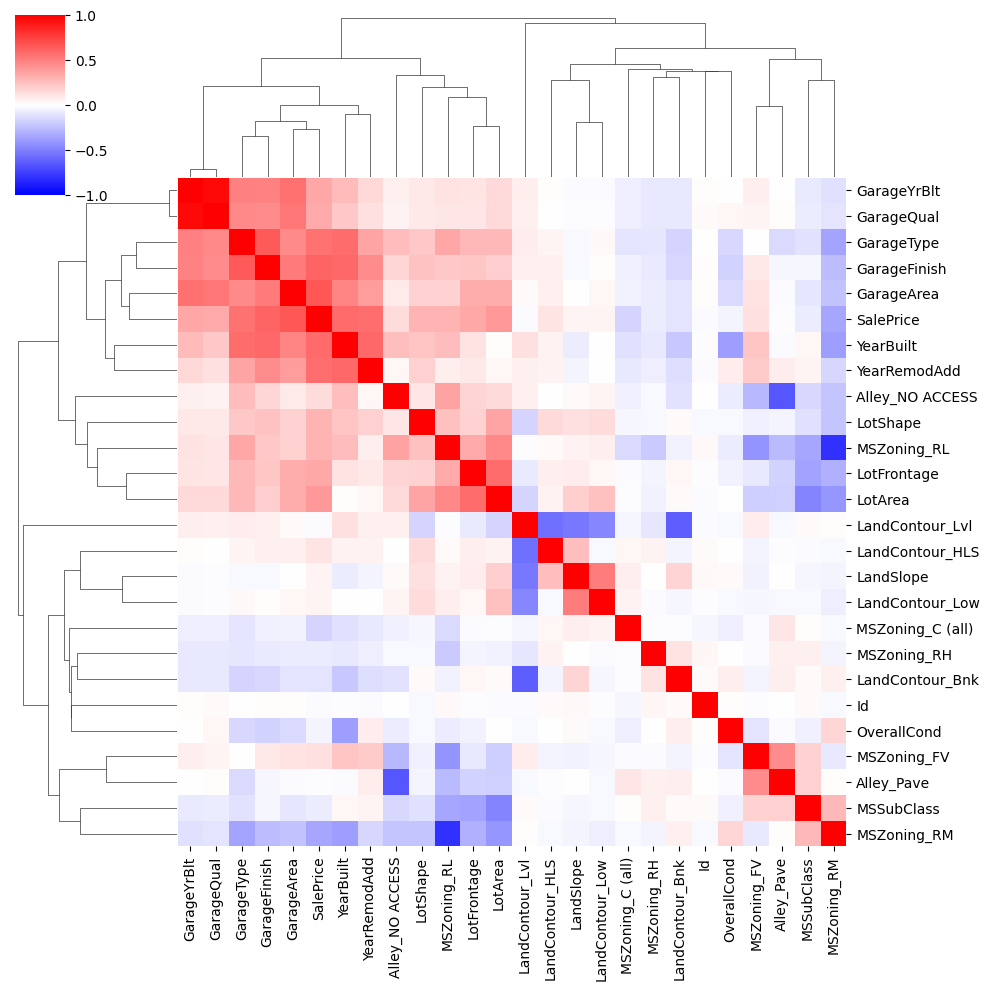

In [79]:
new_data = pd.DataFrame(data[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape','LotConfig', 'LandSlope','OverallQual', 'OverallCond', 'YearBuilt','YearRemodAdd','GarageType','GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual','SalePrice',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Alley_NO ACCESS', 'Alley_Pave', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl']])
data_num = new_data.loc[:,new_data.dtypes != object]
data_num.corr()
sns.clustermap(data_num.corr(), cmap="bwr", vmin=-1,vmax=1);

Como ya dijimos anteriormente, se puede apreciar que hay un fuerte correlación positiva entre:
    - GarageYrBlt,GarageQual
    - GarageType, GarageFinish
Y una fuerte correlación negativa en relación a las variables del sitio donde se ubica la vivienda:
    - LotArea con MSZoning_RM
    - LotFrontage y LotArea con MSZoning_FV
Lo que más nos llamo la atención son las variables que tienen una correlación positiva con SalePrice:
    - La mayoría de las variables de Garage (excepto GarageYrBlt y GarageQual que tienen menos), lo cuál tiene sentido porque el tipo de garage, lo grande que es y el acabado de este, hacen que aumente el precio de la vivienda
    - Con YearBuilt y YearRemodAdd, porque cuánto más nueva sea o si se ha reformado hace poco, más costará
    - LotArea y LotFrontage tienen cierta correlación, lo cual indica que el tamaño del suelo en el que ésta la propiedad importa
También nos sorpendió que tuviese una correlación negativa con MSZoning_RM (Residential Medium Density), suponemos que la zona influye bastamte te en el precio
Igualmente se puede ver la correlación negativa que tienen MSSubClass con LotFrontage (que se mencionó anteriormente), y sobretodo con LotArea
Por otro lado, llama la atención como los valores de la distintas variables categóricas tienen una correlación negativa (MSZoning_RL,MSZoning_RM; LandContour_Bnk, LandContour_Lvl; Alley_NO ACCES, Alley_Pave)
Por último se puede ver que en MSZoning_RM (Residential Medium Density) no hay muchos garajes.